### This file plots the processed csv files with matplotlib

Note: manually select date and file name in the corresponding section (either cpu, netsend or netrecv)

In [68]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import numpy as np
import pandas as pd

## Adjust date of processed csv files

In [69]:
#date = '2018-11-04_00h57'
date = '2018-12-06_23h08'
base_path = '/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/one_mw/' + date + '/'
worker_list = [8,16,32,64]

In [70]:
def y_fmt(tick_val, pos):
    if tick_val > 1000000:
        val = int(tick_val)/1000000
        return str(val).rstrip('0') + ' M'
    elif tick_val >= 1000:
        val = int(tick_val) / 1000
        return str(val).rstrip('0') + ' k'
    else:
        return tick_val

## CPU utilization plot

In [82]:
# read data into pandas dataframe
file_name = 'dstat_mw_cpu_ratio_1:0.csv'
df_c = pd.read_csv(base_path + file_name)
df_c = df_c[df_c['client'] <= 192]
df_c

,client,worker,cpu_mean,cpu_std
0,6,8,8.451628,0.049583
1,6,16,8.535552,0.106226
2,6,32,8.474574,0.059183
3,6,64,9.938732,0.224501
4,24,8,14.399656,0.431208
5,24,16,20.297934,0.312135
6,24,32,21.666481,0.276625
7,24,64,22.481383,0.077562
8,48,8,14.343443,0.304587
9,48,16,20.917475,0.221315


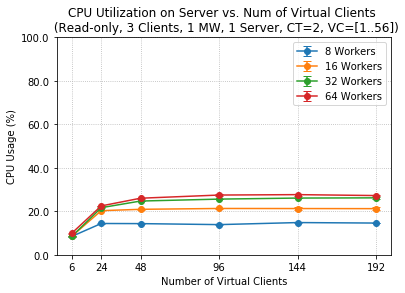

In [83]:
f = plt.figure()
plt.title("CPU Utilization on Server vs. Num of Virtual Clients \n (Read-only, 3 Clients, 1 MW, 1 Server, CT=2, VC=[1..56])")

for worker in worker_list:
    # extract values of interest
    df_c_cut = df_c[(df_c.worker == worker)]
    
    vcs = df_c_cut['client']
    tps = df_c_cut['cpu_mean']
    std = df_c_cut['cpu_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = std, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("CPU Usage (%)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=100)
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/one_mw/"+date+"/"+file_name[:-4]+".png", dpi = 150)

## Network send activity plot

In [88]:
# read data into pandas dataframe
file_name = 'dstat_mw_netsend_ratio_1:0.csv'
df_c = pd.read_csv(base_path + file_name)
df_c = df_c[df_c['client'] <= 192]
df_c

,client,worker,netsend_mean,netsend_std
0,6,8,1.518878e+07,4.396830e+05
1,6,16,1.546958e+07,7.863747e+04
2,6,32,1.525287e+07,3.588555e+05
3,6,64,1.530409e+07,1.818446e+05
4,24,8,2.876200e+07,4.269250e+05
5,24,16,2.980425e+07,4.737945e+05
6,24,32,2.885096e+07,6.450326e+05
7,24,64,2.809491e+07,5.370851e+05
8,48,8,3.081555e+07,1.010440e+06
9,48,16,3.510478e+07,9.852570e+05


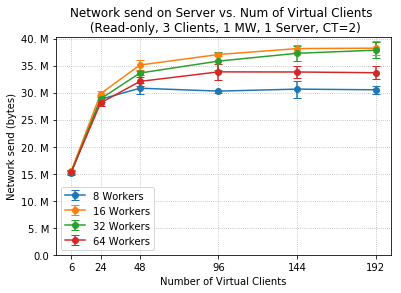

In [89]:
f = plt.figure()
plt.title("Network send on Server vs. Num of Virtual Clients \n (Read-only, 3 Clients, 1 MW, 1 Server, CT=2)")

for worker in worker_list:
    # extract values of interest
    df_c_cut = df_c[(df_c.worker == worker)]
    
    vcs = df_c_cut['client']
    tps = df_c_cut['netsend_mean']
    std = df_c_cut['netsend_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = std, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("Network send (bytes)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=2e6+np.max(df_c['netsend_mean']))
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/one_mw/"+date+"/"+file_name[:-4]+".png", dpi = 150)

## Network recv activity plot

In [75]:
# read data into pandas dataframe
file_name = 'dstat_mw_netrecv_ratio_1:0.csv'
df_c = pd.read_csv(base_path + file_name)
df_c = df_c[df_c['client'] <= 192]
df_c

,client,worker,netrecv_mean,netrecv_std
0,6,8,1.565172e+07,4.530730e+05
1,6,16,1.594086e+07,8.121617e+04
2,6,32,1.571766e+07,3.696458e+05
3,6,64,1.576224e+07,1.874611e+05
4,24,8,2.964007e+07,4.396675e+05
5,24,16,3.071583e+07,4.881259e+05
6,24,32,2.973457e+07,6.643426e+05
7,24,64,2.895135e+07,5.522929e+05
8,48,8,3.175690e+07,1.039911e+06
9,48,16,3.618477e+07,1.012771e+06


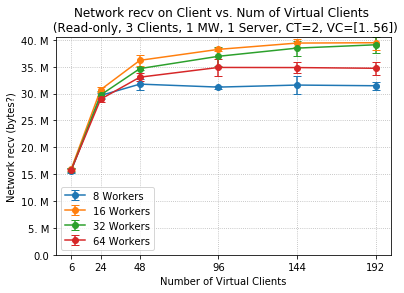

In [76]:
f = plt.figure()
plt.title("Network recv on Client vs. Num of Virtual Clients \n (Read-only, 3 Clients, 1 MW, 1 Server, CT=2, VC=[1..56])")

for worker in worker_list:
    # extract values of interest
    df_c_cut = df_c[(df_c.worker == worker)]
    
    vcs = df_c_cut['client']
    tps = df_c_cut['netrecv_mean']
    std = df_c_cut['netrecv_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = std, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("Network recv (bytes?)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=1e6+np.max(df_c['netrecv_mean']))
plt.legend()


ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/one_mw/"+date+"/"+file_name[:-4]+".png", dpi = 150)